<a href="https://colab.research.google.com/github/Nerebos/Inmsersion-de-datos/blob/main/Desafios_Clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1921,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,86,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1638,Apartamento,Apartamento en venta en Suba,3,2,103,Suba,Suba,$ 530.000.000
3894,Apartamento,Apartamento en venta en Chapinero,2,3,104,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 895.000.000
5615,Apartamento,Apartamento en venta en Engativa,3,2,70,Engativa,Engativá,$ 298.500.000
6020,Apartamento,Apartamento en venta en Metropolis,3,2,80,Metropolis,Las Ferias,$ 353.000.000
4952,Apartamento,Apartamento en venta en Fontibón,1,2,44,Fontibón,Fontibón,$ 260.000.000
4812,Apartamento,Apartamento en venta en Usaquén,3,2,63,Usaquén,Usaquén,$ 270.000.000
2470,Apartamento,Apartamento en venta en Zona Noroccidental,3,4,196,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 998.000.000
2898,Casa,Casa en venta en Barrios Unidos,3,5,650,Barrios Unidos,Los Andes,$ 1.500.000.000
1180,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,38,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 168.000.000


In [46]:
inmuebles_area = inmuebles.Area.value_counts()
inmuebles_area

47      260
60      174
48      172
54      168
70      151
       ... 
3500      1
414       1
251       1
1100      1
594       1
Name: Area, Length: 478, dtype: int64

In [47]:
inmuebles_area1 = inmuebles_area[0:10]
inmuebles_area1
sum(inmuebles_area1)

1608

In [51]:
prom_area = inmuebles.groupby('Barrio')['Area'].mean()
prom_area

Barrio
Alameda                97.000000
Alhambra              190.411765
Andes Norte           124.857143
Antonio Nariño        163.062500
Barrancas              70.200000
                         ...    
Villa Maria           207.153846
Villas De Granada      86.590909
Villemar               76.888889
Zona Franca            54.000000
Zona Noroccidental    135.785633
Name: Area, Length: 149, dtype: float64

In [52]:
mean_10 = prom_area.sort_values(ascending = False).head(10)
mean_10

Barrio
Modelia                  4316.750000
Libertador                642.000000
Bosa Piamonte             400.000000
La Soledad                378.625000
Restrepo                  336.500000
Santa Librada             328.000000
Las Ferias                320.000000
Santa Ana                 309.375000
Veraguas                  302.666667
Bellavista Occidental     286.200000
Name: Area, dtype: float64

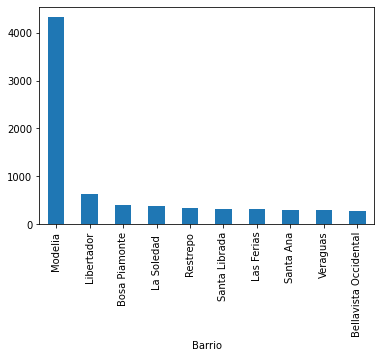

In [63]:
mean_10.plot.bar();

Podemos apreciar como la media de Area en  el Barrio de Modelia en consideramblemente más grande que los demás 

Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

In [60]:
Est_adc = inmuebles.groupby('Barrio')['Area'].agg(['count','mean','median','max','min']).T
Est_adc

Barrio,Alameda,Alhambra,Andes Norte,Antonio Nariño,Barrancas,Barrios Unidos,Bella Suiza,Bellavista Occidental,Bochica,Bogotá D.C,...,Usme,Venecia,Veraguas,Verbenal,Villa Alsacia,Villa Maria,Villas De Granada,Villemar,Zona Franca,Zona Noroccidental
count,1.0,17.000000,7.000000,48.0000,15.0,473.000000,103.000000,5.0,4.00,14.000000,...,51.000000,4.0,6.000000,6.0,35.000000,13.000000,22.000000,18.000000,1.0,877.000000
mean,97.0,190.411765,124.857143,163.0625,70.2,185.621564,119.067961,286.2,134.25,133.785714,...,83.901961,156.5,302.666667,43.0,69.485714,207.153846,86.590909,76.888889,54.0,135.785633
median,97.0,164.000000,108.000000,72.0000,75.0,87.000000,85.000000,173.0,39.00,60.000000,...,51.000000,125.0,162.000000,43.0,63.000000,222.000000,64.000000,59.000000,54.0,78.000000
max,97.0,360.000000,180.000000,554.0000,78.0,8884.000000,811.000000,456.0,420.00,566.000000,...,612.000000,320.0,1200.000000,48.0,225.000000,222.000000,260.000000,224.000000,54.0,5458.000000
min,97.0,50.000000,42.000000,32.0000,63.0,28.000000,46.000000,173.0,39.00,43.000000,...,31.000000,56.0,59.000000,38.0,41.000000,51.000000,50.000000,45.000000,54.0,16.000000
